### 3-parameter exponential fitted $\beta$-scaling

Want to fit observable data as a function of $\beta$ to the form:
$$
\mathcal{O}(\beta) = \mathcal{O}_{\beta\to\infty} + C_1 e^{-C_2 \beta}
$$

where $\mathcal{O}_{\beta\to\infty}$,$C_1$, and $C_2$ are fitting parameters. The $\mathcal{O}_{\beta\to\infty}$ parameter will give a large $\beta$ extrapolation of the observable in question. Here, we will focus on the second Rényi entanglement entropy $S_2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

Define the exponential model

In [2]:
def exponential(x, c1, c2, c3):
    return c3 + c1*np.exp(-x*c2)

In [3]:
# Array where extrapolated S2s will be saved to
extrapolated_S2s = np.zeros(15)
extrapolated_S2s_err = np.zeros(15)

Feed data points (obtained from a separate script)

In [4]:
U_list = np.array([0.500000,
                0.730000,
                1.065800,
                1.556100, 
                2.272000, 
                3.300000, 
                4.843100, 
                7.071100,   
                10.323900,
                16.666667, 
                22.007100, 
                32.130800,
                46.911700,
                68.492100,
                100.000000])

In [5]:
# Define data points
betas = np.array([1,2,4,8,16,32]) # betas

In [6]:
data = np.ones((betas.size,15))
data

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [7]:
# Initialize arrays that will store S2 data (rows: betas, columns: U)
data = np.ones((betas.size,15))
data[0] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_1.000000_10001_S2.dat")[:,1]
data[1] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_2.000000_10001_S2.dat")[:,1]
data[2] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_4.000000_10001_S2.dat")[:,1]
data[3] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_8.000000_10001_S2.dat")[:,1]
data[4] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_16.000000_10001_S2.dat")[:,1]
data[5] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_32.000000_10001_S2.dat")[:,1]

errs = np.ones((betas.size,15))
errs[0] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_1.000000_10001_S2.dat")[:,2]
errs[1] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_2.000000_10001_S2.dat")[:,2]
errs[2] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_4.000000_10001_S2.dat")[:,2]
errs[3] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_8.000000_10001_S2.dat")[:,2]
errs[4] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_16.000000_10001_S2.dat")[:,2]
errs[5] = np.loadtxt("../ProcessedData/1D_256_256_128_Us_1.000000_32.000000_10001_S2.dat")[:,2]

In [8]:
data[:,0]

array([3.33421679, 3.144057  , 2.96028472, 2.75322643, 2.58731177,
       2.47266143])

In [9]:
data.shape

(6, 15)

In [10]:
c1_list = []
c1Err_list = []

c2_list = []
c2Err_list = []

c3_list = []
c3Err_list = []

S2 (extrapolated) 

2.481146 +/- 0.034701


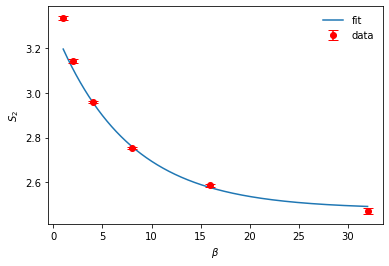

In [11]:
# Obtained with entanglement_combiner.py for betas
U = 0.500000
y_array_exp = data[:,0]
sigmas = errs[:,0]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[0] = c3
extrapolated_S2s_err[0] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

2.368975 +/- 0.003893


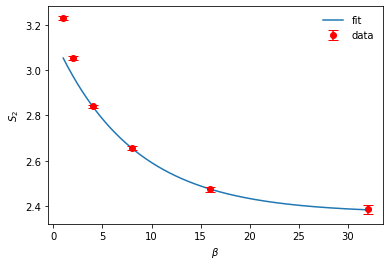

In [12]:
# Obtained with entanglement_combiner.py for betas
U = 0.730000
y_array_exp = data[:,1]
sigmas = errs[:,1]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[1] = c3
extrapolated_S2s_err[1] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

2.314380 +/- 0.022352


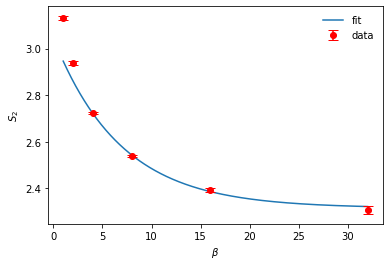

In [13]:
# Obtained with entanglement_combiner.py for betas
U = 1.0658
y_array_exp = data[:,2]
sigmas = errs[:,2]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[2] = c3
extrapolated_S2s_err[2] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

2.192385 +/- 0.045942


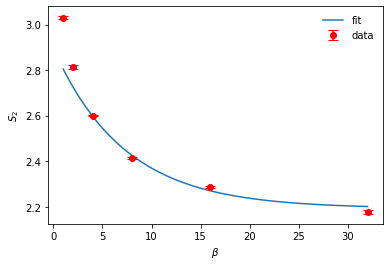

In [14]:
# Obtained with entanglement_combiner.py for betas
U = 1.5561
y_array_exp = data[:,3]
sigmas = errs[:,3]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[3] = c3
extrapolated_S2s_err[3] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

2.092556 +/- 0.024354


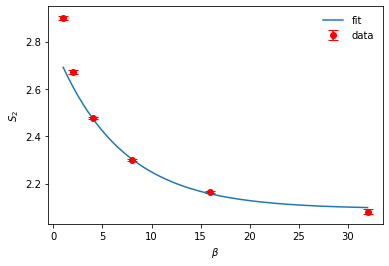

In [15]:
# Obtained with entanglement_combiner.py for betas
U = 2.272
y_array_exp = data[:,4]
sigmas = errs[:,4]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[4] = c3
extrapolated_S2s_err[4] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.962563 +/- 0.023890


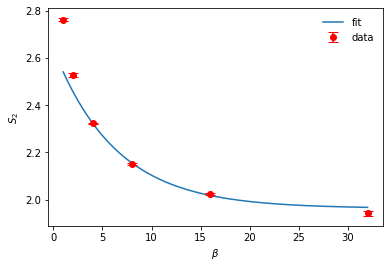

In [16]:
# Obtained with entanglement_combiner.py for betas
U = 3.3
y_array_exp = data[:,5]
sigmas = errs[:,5]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[2:], y_array_exp[2:],sigma=sigmas[2:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[5] = c3
extrapolated_S2s_err[5] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

In [17]:
# #### To summarize extrapolations in SF (gapless) phase (referee reply)
# with plt.style.context('../IOP_large.mplstyle'):

#     # Obtained with entanglement_combiner.py for betas
#     U = 0.500000
#     y_array_exp = data[:,0]
#     sigmas = errs[:,0]

#     # Perform 3-parameter exponential fit
#     popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[3:], y_array_exp[3:],sigma=sigmas[3:],p0=[0.9,0.1,y_array_exp[-1]])

#     # Extract fit parameters
#     c1,c2,c3 = popt_exponential
#     c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))
    
#     print("C3: ",c3)

#     extrapolated_S2s[0] = c3
#     extrapolated_S2s_err[0] = c3_err

#     # Perform the fit
#     betas_fit = np.linspace(min(betas[3:]),max(betas[3:])*1,1000)
#     y_fit = exponential(betas_fit,c1,c2,c3)

#     plt.plot(np.exp(-betas_fit*c2),y_fit,label=None,alpha=1.0)
#     plt.errorbar(np.exp(-betas[3:]*c2),y_array_exp[3:], yerr=sigmas[3:],color='tab:blue',marker='o',label=r'$%.2f$'%U,fmt='.',
#                 capsize=5,mfc='lightblue')
#     # plt.axhline(1.618707279824E+00 ,color='tab:blue',alpha=0.3,ls='--',zorder=-2)

#     U = 0.730000
#     y_array_exp = data[:,1]
#     sigmas = errs[:,1]

#     # Perform 3-parameter exponential fit
#     popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[3:], y_array_exp[3:],sigma=sigmas[3:],p0=[0.9,0.1,y_array_exp[-1]])

#     # Extract fit parameters
#     c1,c2,c3 = popt_exponential
#     c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

#     extrapolated_S2s[1] = c3
#     extrapolated_S2s_err[1] = c3_err

#     # Perform the fit
#     betas_fit = np.linspace(min(betas[3:]),max(betas[3:])*1,1000)
#     y_fit = exponential(betas_fit,c1,c2,c3)

#     plt.plot(np.exp(-betas_fit*c2),y_fit,label=None,alpha=1.0)
#     plt.errorbar(np.exp(-betas[3:]*c2),y_array_exp[3:], yerr=sigmas[3:],color='tab:orange',marker='o',label=r'$%.2f$'%U,fmt='.',
#                 capsize=5,mfc='peachpuff')
#     # plt.axhline(1.564159771194E+00,color='tab:orange',alpha=0.3,ls='--',zorder=-2)

#     U = 1.0658
#     y_array_exp = data[:,2]
#     sigmas = errs[:,2]

#     # Perform 3-parameter exponential fit
#     popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[3:], y_array_exp[3:],sigma=sigmas[3:],p0=[0.9,0.1,y_array_exp[-1]])

#     # Extract fit parameters
#     c1,c2,c3 = popt_exponential
#     c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

#     extrapolated_S2s[2] = c3
#     extrapolated_S2s_err[2] = c3_err

#     # Perform the fit
#     betas_fit = np.linspace(min(betas[3:]),max(betas[3:])*1,1000)
#     y_fit = exponential(betas_fit,c1,c2,c3)

#     plt.plot(np.exp(-betas_fit*c2),y_fit,label=None,alpha=1.0)
#     plt.errorbar(np.exp(-betas[3:]*c2),y_array_exp[3:], yerr=sigmas[3:],color='tab:green',marker='o',label=r'$%.2f$'%U,fmt='.',
#                 capsize=5,mfc='honeydew')
#     # plt.axhline(1.504274458981E+00,color='tab:green',alpha=0.3,ls='--',zorder=-2)

#     U = 1.5561
#     y_array_exp = data[:,3]
#     sigmas = errs[:,3]

#     # Perform 3-parameter exponential fit
#     popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[3:], y_array_exp[3:],sigma=sigmas[3:],p0=[0.9,0.1,y_array_exp[-1]])

#     # Extract fit parameters
#     c1,c2,c3 = popt_exponential
#     c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

#     extrapolated_S2s[3] = c3
#     extrapolated_S2s_err[3] = c3_err

#     # Perform the fit
#     betas_fit = np.linspace(min(betas[3:]),max(betas[3:])*1,1000)
#     y_fit = exponential(betas_fit,c1,c2,c3)

#     plt.plot(np.exp(-betas_fit*c2),y_fit,label=None,alpha=1.0)
#     plt.errorbar(np.exp(-betas[3:]*c2),y_array_exp[3:], yerr=sigmas[3:],color='tab:red',marker='o',label=r'$%.2f$'%U,fmt='.',
#                 capsize=5,mfc='mistyrose')
#     # plt.axhline(1.436103011355E+00,color='tab:red',alpha=0.3,ls='--',zorder=-2)

#     U = 2.272
#     y_array_exp = data[:,4]
#     sigmas = errs[:,4]

#     # Perform 3-parameter exponential fit
#     popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[3:], y_array_exp[3:],sigma=sigmas[3:],p0=[0.9,0.1,y_array_exp[-1]])

#     # Extract fit parameters
#     c1,c2,c3 = popt_exponential
#     c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

#     extrapolated_S2s[4] = c3
#     extrapolated_S2s_err[4] = c3_err

#     # Perform the fit
#     betas_fit = np.linspace(min(betas[3:]),max(betas[3:])*1,1000)
#     y_fit = exponential(betas_fit,c1,c2,c3)

#     plt.plot(np.exp(-betas_fit*c2),y_fit,label=None,alpha=1.0)
#     plt.errorbar(np.exp(-betas[3:]*c2),y_array_exp[3:], yerr=sigmas[3:],color='tab:purple',marker='o',label=r'$%.2f$'%U,fmt='.',
#                 capsize=5,mfc='lavenderblush')
#     # plt.axhline(1.352367674599E+00,color='tab:purple',alpha=0.3,ls='--',zorder=-2)

# #     U = 3.3
# #     y_array_exp = data[:,5]
# #     sigmas = errs[:,5]

# #     # Perform 3-parameter exponential fit
# #     popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[3:], y_array_exp[3:],sigma=sigmas[3:],p0=[0.9,0.1,y_array_exp[-1]])

# #     # Extract fit parameters
# #     c1,c2,c3 = popt_exponential
# #     c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# #     extrapolated_S2s[5] = c3
# #     extrapolated_S2s_err[5] = c3_err

# #     # Perform the fit
# #     betas_fit = np.linspace(min(betas),max(betas)*1,1000)
# #     y_fit = exponential(betas_fit,c1,c2,c3)

# #     plt.plot(betas_fit,y_fit,label=None)
# #     plt.errorbar(betas[3:],y_array_exp[3:], yerr=sigmas[3:],color='red',marker='o',label=r'$U/t=$',fmt='.',
# #                 capsize=5)

#     plt.legend(frameon=False,ncol=1,handlelength=0.5,handleheight=0.01,
#               labelspacing=1.14,loc=(0.83,0.01),title=r"$U/t$")

#     plt.ylabel(r'$S_2$')
#     # plt.xlabel(r'$\beta t$')
#     plt.xlabel(r'$x = e^{-\beta t c_2}$')
    
#     # plt.xlim(betas[0]-0.2,betas[-1]+0.2)
    
#     plt.tick_params(direction='in',which='both')
    
#     plt.annotate(r'$L=256$',(0.20-0.05,0.85+0.023),xycoords='figure fraction',fontsize=12)
#     plt.annotate(r'$N=256$',(0.35-0.05,0.85+0.023),xycoords='figure fraction',fontsize=12)
#     plt.annotate(r'$\ell=128$',(0.52-0.05,0.85+0.023),xycoords='figure fraction',fontsize=12)

#     plt.savefig("../figures/extrapolations_N256_gapless.pdf",dpi=300)
#     plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/extrapolations_N256_gapless.pdf",dpi=300)
    

# print("S2 (extrapolated) \n")
# print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.759845 +/- 0.263170


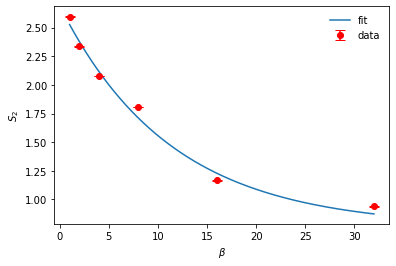

In [18]:
# Obtained with entanglement_combiner.py for betas
U = 4.843100
y_array_exp = data[:,6]
sigmas = errs[:,6]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[6] = c3
extrapolated_S2s_err[6] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.356737 +/- 0.002854


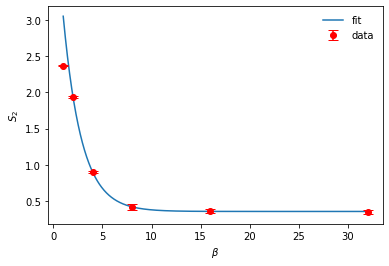

In [19]:
# Obtained with entanglement_combiner.py for betas
U = 7.0711
y_array_exp = data[:,7]
sigmas = errs[:,7]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[7] = c3
extrapolated_S2s_err[7] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.156429 +/- 0.001819


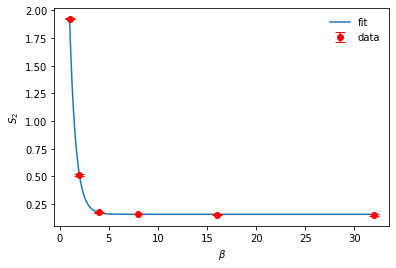

In [20]:
# Obtained with entanglement_combiner.py for betas
U = 10.3239
y_array_exp = data[:,8]
sigmas = errs[:,8]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[8] = c3
extrapolated_S2s_err[8] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.049898 +/- 0.002582


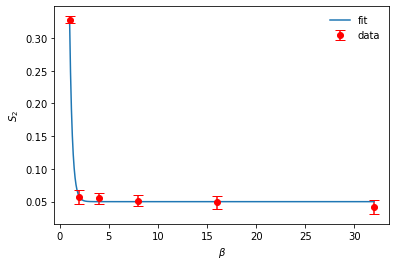

In [21]:
# Obtained with entanglement_combiner.py for betas
U = 16.666667
y_array_exp = data[:,9]
sigmas = errs[:,9]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[9] = c3
extrapolated_S2s_err[9] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.040532 +/- 0.002646


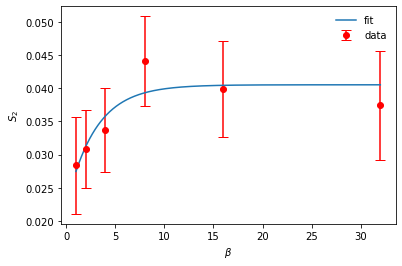

In [22]:
# Obtained with entanglement_combiner.py for betas
U = 22.007100
y_array_exp = data[:,10]
sigmas = errs[:,10]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[10] = c3
extrapolated_S2s_err[10] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

In [23]:
errs[:,11]

array([0.00449217, 0.00454683, 0.00445229, 0.00471637, 0.00540917,
       0.00637219])

S2 (extrapolated) 

0.017100 +/- 0.001927


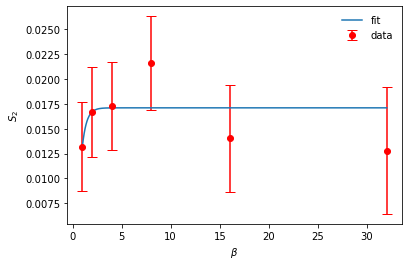

In [24]:
# Obtained with entanglement_combiner.py for betas
U = 32.130800
y_array_exp = data[:,11]
sigmas = errs[:,11]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[1.9,1.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[11] = c3
extrapolated_S2s_err[11] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.008594 +/- 0.003195


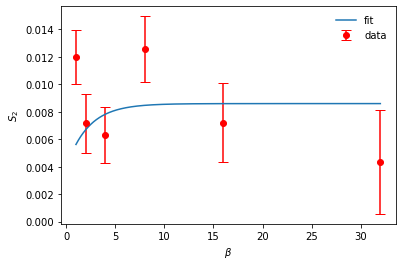

In [25]:
# Obtained with entanglement_combiner.py for betas
U = 46.911700
y_array_exp = data[:,12]
sigmas = errs[:,12]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[12] = c3
extrapolated_S2s_err[12] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.003617 +/- 0.000181


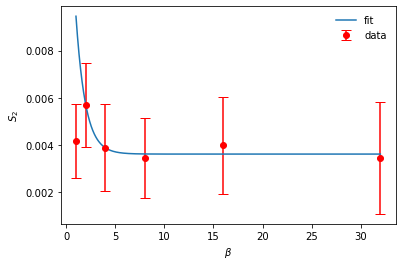

In [26]:
# Obtained with entanglement_combiner.py for betas
U = 68.492100
y_array_exp = data[:,13]
sigmas = errs[:,13]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[13] = c3
extrapolated_S2s_err[13] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

0.001145 +/- 0.001627


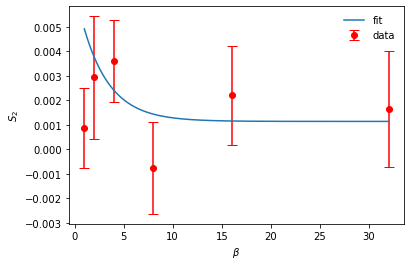

In [27]:
# Obtained with entanglement_combiner.py for betas
U = 100.00
y_array_exp = data[:,14]
sigmas = errs[:,14]

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[0.9,0.1,y_array_exp[-1]])

# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# Save fit parameters for this interaction strength
c1_list.append(c1)
c1Err_list.append(c1_err)

c2_list.append(c2)
c2Err_list.append(c2_err)

c3_list.append(c3)
c3Err_list.append(c3_err)

extrapolated_S2s[14] = c3
extrapolated_S2s_err[14] = c3_err

# Perform the fit
betas_fit = np.linspace(min(betas),max(betas)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

Perform exponential fit to data with Scipy curve_fit

In [28]:
print(list(extrapolated_S2s))
print(list(extrapolated_S2s_err))

[2.481146475722196, 2.3689754424387615, 2.3143804544446267, 2.1923847845276576, 2.092556007340245, 1.9625626581662874, 0.7598452499996117, 0.35673739040683017, 0.15642898159589008, 0.049897722981096945, 0.04053236616454268, 0.01709983486747289, 0.008594476479895991, 0.0036169312706772422, 0.0011448981896688695]
[0.03470079096839365, 0.00389306582216278, 0.022352377014657695, 0.04594239907000851, 0.024354149991319414, 0.023889943927055804, 0.2631697261425994, 0.002853633438325747, 0.001819022481226548, 0.0025824048313832938, 0.0026457512960310413, 0.0019267699054918205, 0.0031949207928844685, 0.0001810573520799364, 0.0016265374494737995]


In [29]:
# Save the extrapolations to file here
D=1
L=256
N=256
l_max=128
t=1.000000
bin_size=10001
beta_list = np.array(betas)
#Format the data file
with open("../ProcessedData/"+str(D)+"D_%d_%d_%d_Us_%.6f_extrapolations_%d_S2.dat"%(L,N,l_max,t,bin_size),"wb") as processed_data:
    np.savetxt(processed_data,np.c_[U_list,extrapolated_S2s,extrapolated_S2s_err],delimiter=" ",fmt="%.16f",header="BH Parameters: L=%d,N=%d,D=%d,l=%d,t=%.6f,beta=extrapolations,bin_size=%d \n U               <S2>               StdErr."%(L,N,D,l_max,t,bin_size))

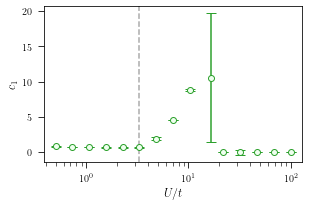

In [30]:
# Print fit parameters as function of interaction strength
with plt.style.context('../IOP_large.mplstyle'):
    plt.xscale("log")
    # plt.plot(U_list,c1_list)
    plt.errorbar(U_list,c1_list, yerr=c1Err_list,color='tab:green',marker='o',label=r'$%.2f$'%U,fmt='.',
                capsize=5,mfc='honeydew')
    plt.ylabel(r"$c_1$")
    plt.xlabel(r"$U/t$")
    plt.axvline(3.3,color='#aaaaaa',ls='--')
    # Save to paper repo
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/c1_vs_Ut_N256.pdf",dpi=400)    

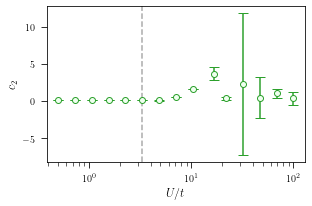

In [31]:
# Print fit parameters as function of interaction strength
with plt.style.context('../IOP_large.mplstyle'):
    plt.xscale("log")
    # plt.plot(U_list,c2_list)
    plt.errorbar(U_list,c2_list, yerr=c2Err_list,color='tab:green',marker='o',label=r'$%.2f$'%U,fmt='.',
                capsize=5,mfc='honeydew')
    plt.ylabel(r"$c_2$")
    plt.xlabel(r"$U/t$")
    plt.axvline(3.3,color='#aaaaaa',ls='--')
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/c2_vs_Ut_N256.pdf",dpi=400)    

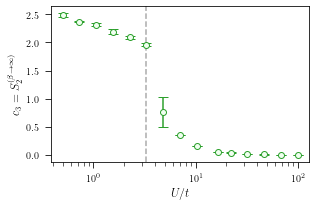

In [32]:
# Print fit parameters as function of interaction strength
with plt.style.context('../IOP_large.mplstyle'):
    plt.xscale("log")
    # plt.plot(U_list,c3_list)
    plt.errorbar(U_list,c3_list, yerr=c3Err_list,color='tab:green',marker='o',label=r'$%.2f$'%U,fmt='.',
                capsize=5,mfc='honeydew')
    plt.ylabel(r"$c_3 = S_2^{(\beta\to\infty)}$")
    plt.xlabel(r"$U/t$")
    plt.axvline(3.3,color='#aaaaaa',ls='--')
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/c3_vs_Ut_N256.pdf",dpi=400)    